In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("spam.csv",delimiter=",",encoding='utf-8',names=["result","mail","1","2","3"])
data=data[["result","mail"]]
data=data.iloc[1:,:]
data

,result,mail
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will _ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [4]:
data["result"]=data["result"].astype("category")
data["result"]=data["result"].cat.codes
data["result"].value_counts()

result
0    4825
1     747
Name: count, dtype: int64

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

In [6]:
x=data["mail"]
y=data["result"]
x

1       Go until jurong point, crazy.. Available only ...
2                           Ok lar... Joking wif u oni...
3       Free entry in 2 a wkly comp to win FA Cup fina...
4       U dun say so early hor... U c already then say...
5       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568    This is the 2nd time we have tried 2 contact u...
5569               Will   _ b going to esplanade fr home?
5570    Pity, * was in mood for that. So...any other s...
5571    The guy did some bitching but I acted like i'd...
5572                           Rofl. Its true to its name
Name: mail, Length: 5572, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
train_m=vectorizer.fit_transform(x_train)
print(train_m.shape)
test_m=vectorizer.transform(x_test)
test_m.shape

(3900, 7164)


(1672, 7164)

In [8]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(train_m,y_train)

MultinomialNB()

In [9]:
y_pred=mb.predict(test_m)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [10]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression(solver="lbfgs",max_iter=400,random_state=42)
l.fit(train_m,y_train)


LogisticRegression(max_iter=400, random_state=42)

In [11]:
y_pred2=l.predict(test_m)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
model = SVC()
model.fit(train_m, y_train)
y_pred3=model.predict(test_m)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
score1=accuracy_score(y_test,y_pred)
score2=accuracy_score(y_test,y_pred2)
print("Accuracy score of Naive Bayes:",score1)
print("Acuuracy score of Logistic Regression:",score2)
print("Accuracy for SVM ",model.score(test_m,y_test))


Accuracy score of Naive Bayes: 0.9599282296650717
Acuuracy score of Logistic Regression: 0.9659090909090909
Accuracy for SVM  0.9796650717703349


In [14]:
cm1=confusion_matrix(y_test,y_pred)
print(cm1)
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)

[[1453    0]
 [  67  152]]
[[1452    1]
 [  56  163]]
[[1453    0]
 [  34  185]]


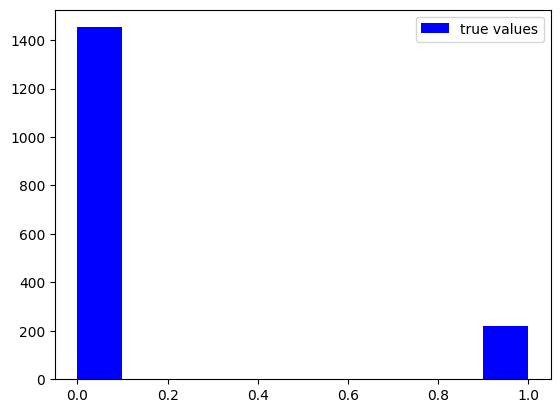

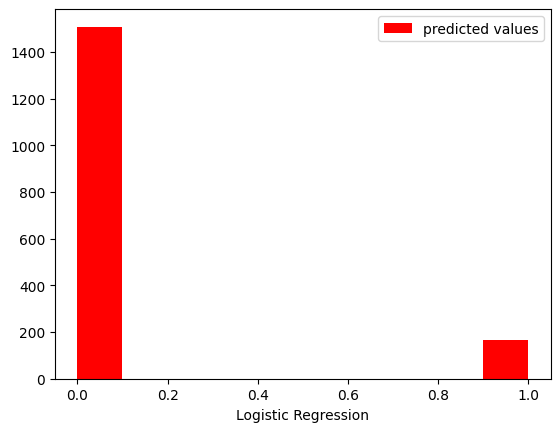

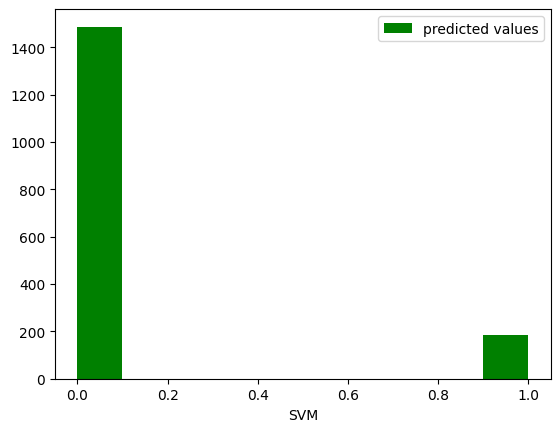

In [15]:

plt.hist(y_test,histtype="bar",color="blue",label=["true values"])
plt.legend(prop={'size': 10})
plt.show()
plt.hist(y_pred2,histtype="bar",color="red",label=["predicted values"])
plt.legend(prop={'size': 10})
plt.xlabel("Logistic Regression")
plt.show()
plt.hist(y_pred3,histtype="bar",color="green",label=["predicted values"])
plt.legend(prop={'size': 10})
plt.xlabel("SVM")
plt.show()

<Axes: >

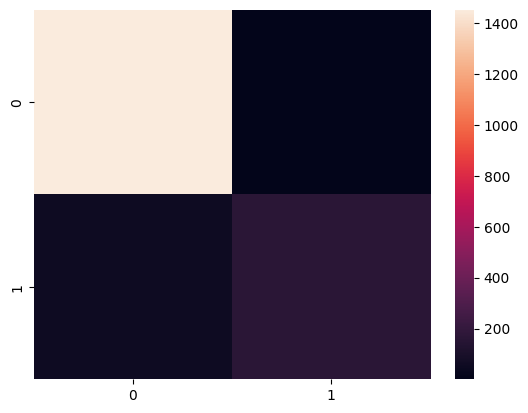

In [16]:
import seaborn as sns
sns.heatmap(cm2)

In [17]:
print(classification_report(y_test, y_pred2, zero_division=0))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       0.99      0.74      0.85       219

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.96      1672

